In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [30]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df.shape

(7043, 21)

In [35]:
#check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
#here all the columns are object type&no values are null
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [37]:
#finding binary value 
binary_columns=[]
column=df.columns
for i in column:
    if df[i].value_counts().shape[0]==2:
        binary_columns.append(i)
        

In [38]:
binary_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [39]:
column=df.columns
for i in column:
    if df[i].value_counts().shape[0]>2:
        print("-----------==="+i+"-------------")
        print(df[i].value_counts())

-----------===customerID-------------
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
-----------===tenure-------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-----------===MultipleLines-------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------===InternetService-------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------===OnlineSecurity-------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------===OnlineBackup-------------
No                     3088
Yes                    2429
No internet 

In [40]:
#drop customer id bcz unique value doesnot have relationship wih output
df=df.drop(columns="customerID")

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

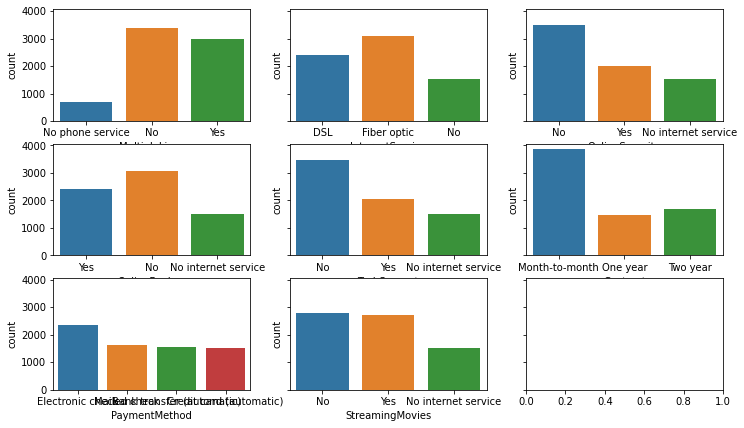

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(12, 7), sharey=True)
sns.countplot("MultipleLines", data=df, ax=axes[0,0])
sns.countplot("InternetService", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("TechSupport", data=df, ax=axes[1,1])
sns.countplot("Contract", data=df, ax=axes[1,2])
sns.countplot("PaymentMethod", data=df, ax=axes[2,0])
sns.countplot("StreamingMovies", data=df, ax=axes[2,1])

In [42]:
column=df.columns
for i in column:
    if df[i].value_counts().shape[0]==2:
        print("-----------==="+i+"-------------")
        print(df[i].value_counts())

-----------===gender-------------
Male      3555
Female    3488
Name: gender, dtype: int64
-----------===SeniorCitizen-------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-----------===Partner-------------
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------===Dependents-------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------===PhoneService-------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------===PaperlessBilling-------------
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
-----------===Churn-------------
No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

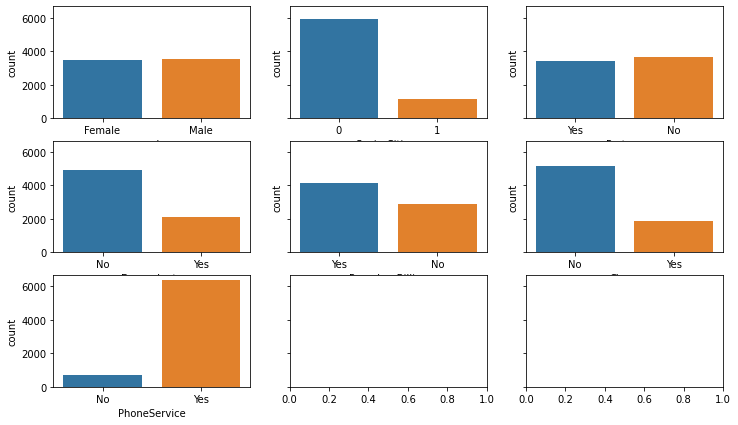

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,1])
sns.countplot("Churn", data=df, ax=axes[1,2])
sns.countplot("PhoneService", data=df, ax=axes[2,0])

In [44]:
#from analysis we can drop gender,total_charges,contract

In [45]:
df=df.drop(columns=["gender","TotalCharges"],axis=1)

In [46]:

df["Partner"]=df["Partner"].replace(["Yes","No"],[1,0]).astype(int)
df["SeniorCitizen"]=df["SeniorCitizen"].replace(["Yes","No"],[1,0]).astype(int)
df["Dependents"]=df["Dependents"].replace(["Yes","No"],[1,0]).astype(int)
df["PaperlessBilling"]=df["PaperlessBilling"].replace(["Yes","No"],[1,0]).astype(int)
df["Churn"]=df["Churn"].replace(["Yes","No"],[1,0]).astype(int)
df["PhoneService"]=df["PhoneService"].replace(["Yes","No"],[1,0]).astype(int)

In [47]:

sns.countplot("StreamingMovies", data=df, ax=axes[2,1])
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df["MultipleLines"]=lbl.fit_transform(df["MultipleLines"])

In [48]:


df["InternetService"]=lbl.fit_transform(df["InternetService"])
df["OnlineSecurity"]=lbl.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"]=lbl.fit_transform(df["OnlineBackup"])
df["TechSupport"]=lbl.fit_transform(df["TechSupport"])
df["PaymentMethod"]=lbl.fit_transform(df["PaymentMethod"])
df["Contract"]=lbl.fit_transform(df["Contract"])
df["StreamingMovies"]=lbl.fit_transform(df["StreamingMovies"])
df["StreamingTV"]=lbl.fit_transform(df["StreamingTV"])
df["DeviceProtection"]=lbl.fit_transform(df["DeviceProtection"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   int64  
 16  MonthlyCharges    7043 non-null   float64


In [50]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


<AxesSubplot:>

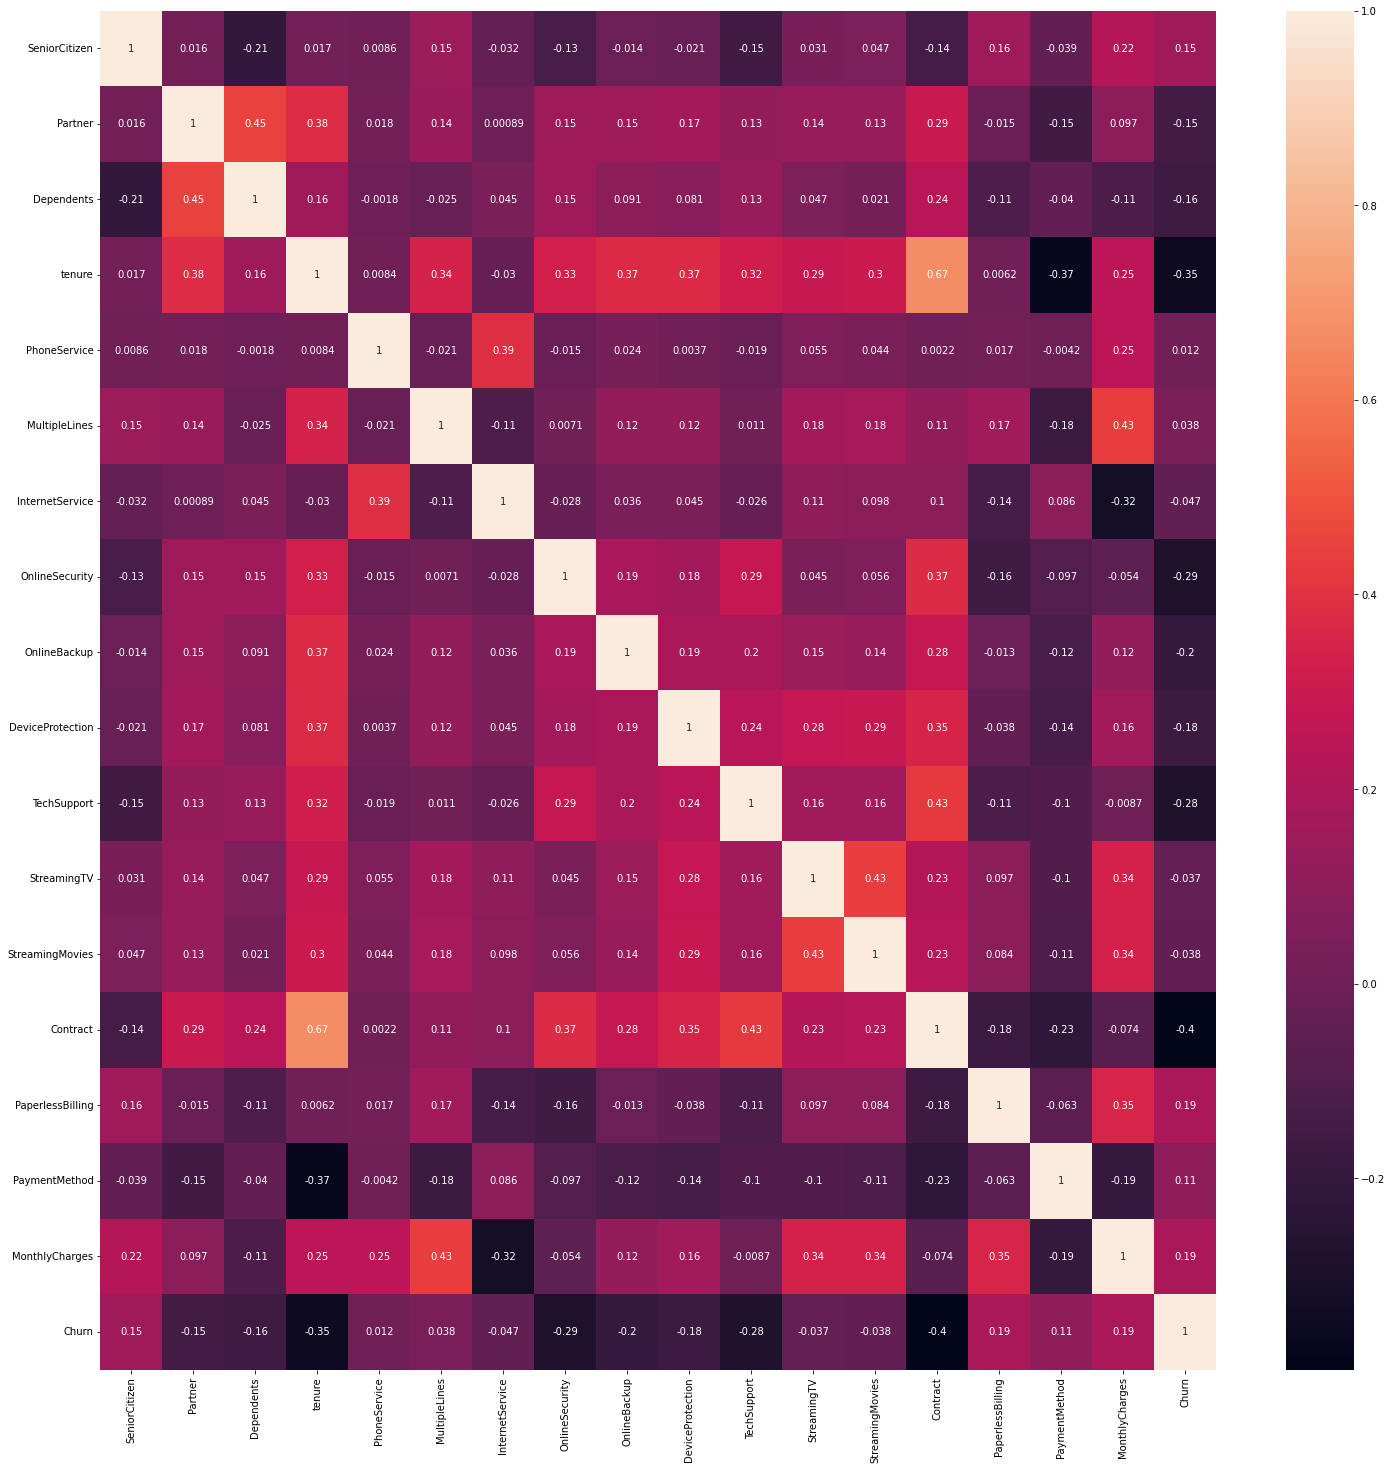

In [51]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Contract', ylabel='Contract'>

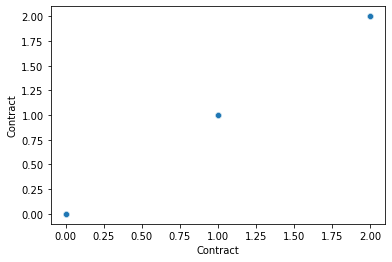

In [52]:
#from heatmap there is no possibilities for multicolinearity and tenture and contract have more relationship
#will check multicolinarity for tenture and contarct
sns.scatterplot(x=df["Contract"],y=df["Contract"],data=df)

In [53]:
#we can drop contract column
df=df.drop(columns="Contract")

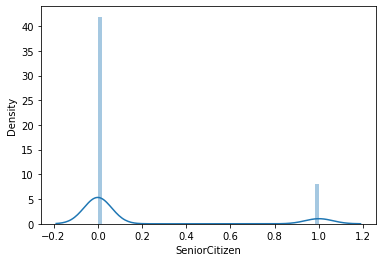

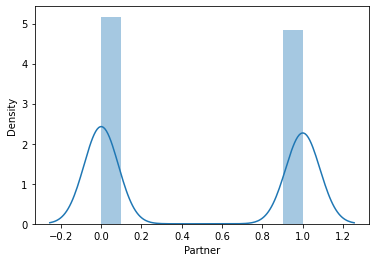

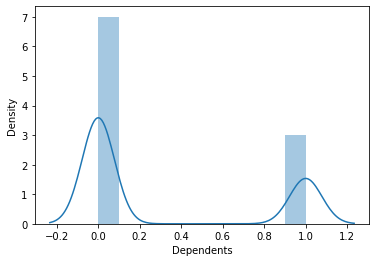

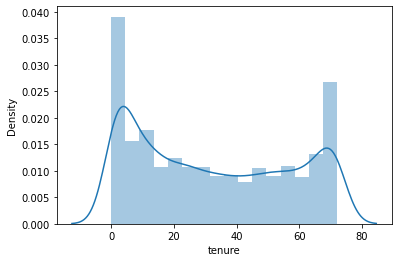

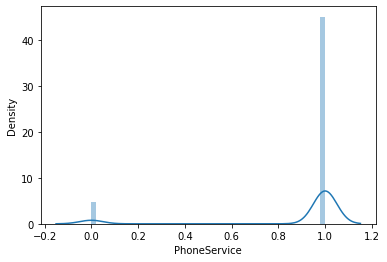

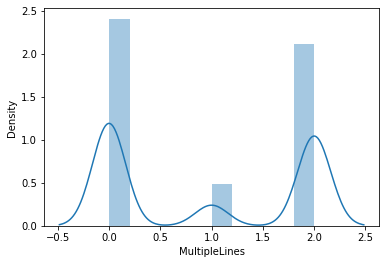

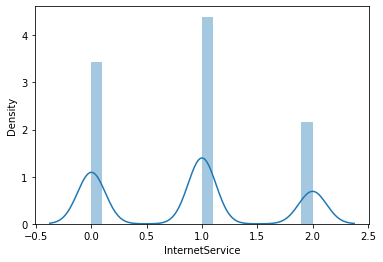

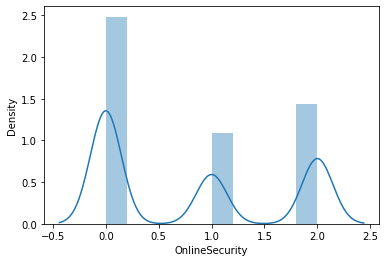

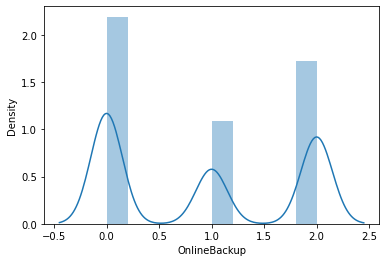

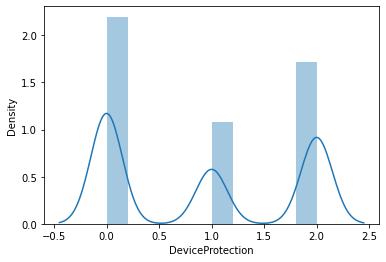

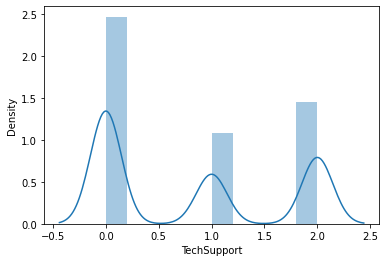

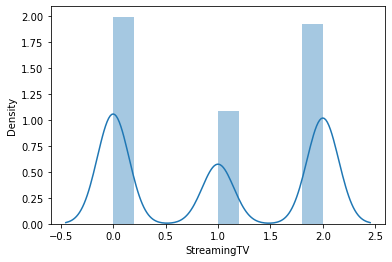

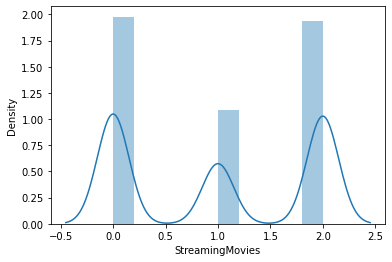

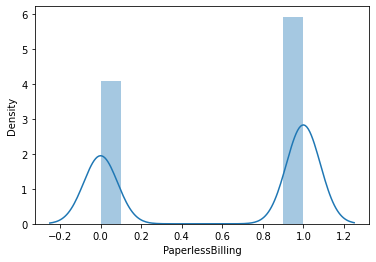

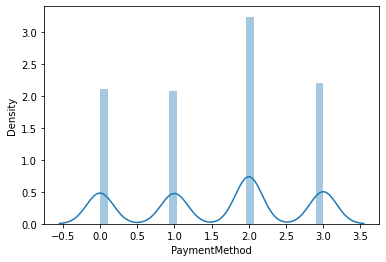

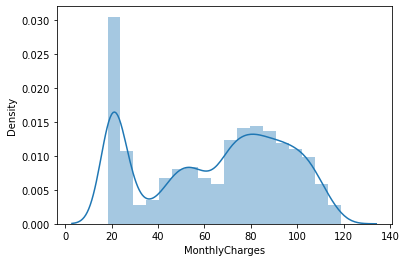

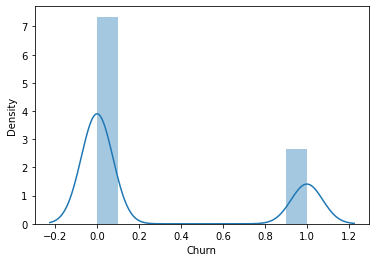

In [54]:
#check for uniform distribtion
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [55]:
#we need to apply statndard scalar for tenture and monthly charges

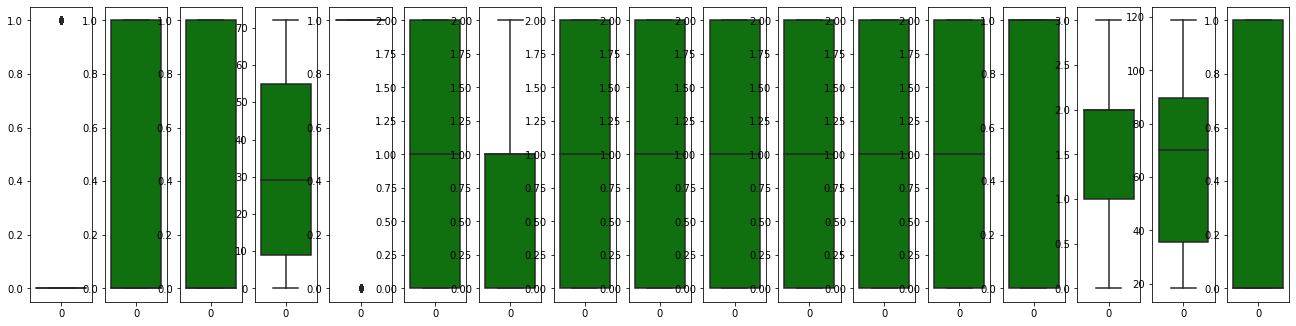

In [56]:
#check for outliers
columnlen=df.columns.values
plt.figure(figsize=(40,90))
for i in range(0,len(columnlen)):
    plt.subplot(14,30,i+1)
    sns.boxplot(data=df[columnlen[i]],orient="v",color="green")

In [57]:
#no outliers

In [58]:
#checkfor skewness
from scipy.stats import zscore
z=df.skew()

In [59]:
z

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

In [60]:
#skewness present for phoneservice,churn,seniorCitizen
from scipy import stats
df["SeniorCitizen"]=stats.yeojohnson(df["SeniorCitizen"])[0]
df["PhoneService"]=stats.yeojohnson(df["PhoneService"])[0]


In [61]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [62]:
x=df.drop(columns="Churn")
y=df["Churn"]


In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.20,)
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [66]:
score=accuracy_score(y_test,y_pred)
score

0.8168914123491838

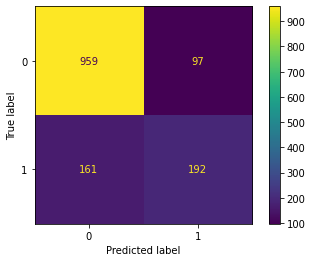

In [67]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [68]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1056
           1       0.66      0.54      0.60       353

    accuracy                           0.82      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.81      0.82      0.81      1409



In [69]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
grid_parameter={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,10),
    "min_samples_split":range(3,10),
    "max_leaf_nodes":range(2,4)
}

In [70]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_parameter,cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [71]:
best_paramter=grid_search.best_params_
print(best_paramter)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [72]:
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 2, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.7494677075940384

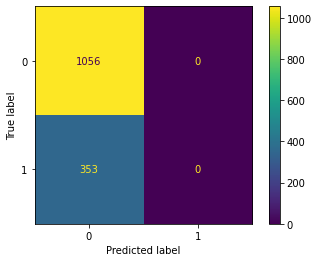

In [73]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [74]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1056
           1       0.00      0.00      0.00       353

    accuracy                           0.75      1409
   macro avg       0.37      0.50      0.43      1409
weighted avg       0.56      0.75      0.64      1409



In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_model=SVC()
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

print(svcClf.best_params_)
print(svcClf.best_score_)

{'C': 10, 'gamma': 0.001}
0.7973057833541186


In [77]:
svc_model=SVC()
params = {'C':[10] , 'gamma': [0.001]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': [10], 'gamma': [0.001]},
             scoring='accuracy')

In [78]:
y_pred=svcClf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8097941802696949

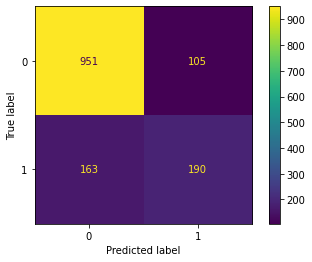

In [79]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [80]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1056
           1       0.64      0.54      0.59       353

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [81]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
#
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf.fit(x_train, y_train)

RandomForestClassifier()

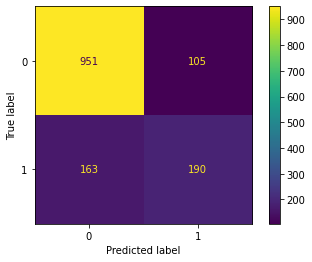

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1056
           1       0.64      0.54      0.59       353

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [84]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [85]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
score=accuracy_score(y_test,y_pred)

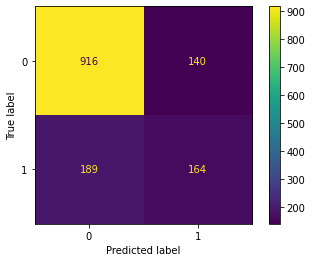

In [86]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [87]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1056
           1       0.54      0.46      0.50       353

    accuracy                           0.77      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.76      0.77      0.76      1409



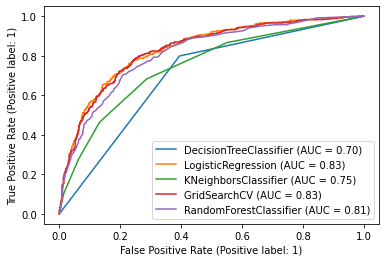

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,plot_roc_curve
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

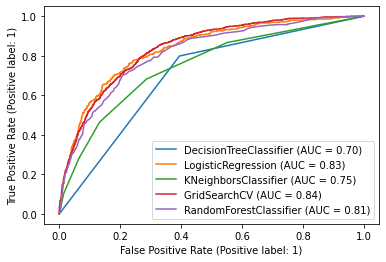

In [89]:
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [90]:
#Logistic regression is the best . it is low of cost gives better accuracy
import pickle
filename="Survive"
pickle.dump(lr,open(filename,"wb"))